### Import libraries and Dataset

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.


In [2]:
# Path to folder
path = r'C:\Users\Kripamahesh\Documents\Achievement 6 Task 6.1'

In [3]:
# Import dataset
df_clean=pd.read_csv(os.path.join(path, '02.DATA', 'chocolate_bar_rates.csv'))

In [4]:
df_clean.shape

(2530, 12)

In [5]:
df_clean.head()

,Unnamed: 0,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [7]:
# dropping Unnames: 0 
df_clean.drop('Unnamed: 0', axis = 1, inplace = True)

### Step 2

In [8]:
# Removing all categorial variable

df_clean.drop(['manufacturer','company_location','bean_origin','bar_name','ingredients','review'], axis = 1, inplace = True )

In [9]:
df_clean.head()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
0,2454,2019,76.0,3.0,3.25
1,2458,2019,76.0,3.0,3.50
2,2454,2019,76.0,3.0,3.75
3,2542,2021,68.0,3.0,3.00
4,2546,2021,72.0,3.0,3.00


In [12]:
# Check null values
df_clean.isnull().sum()

id                  0
year_reviewed       0
cocoa_percent       0
num_ingredients    87
rating              0
dtype: int64

In [15]:
df_clean = df_clean.dropna(subset=['num_ingredients'])

In [16]:
df_clean.shape

(2443, 5)

### Step 3

In [13]:
# Use the elblow technique 

num_cl = range(1, 10) # Define the range of potential clusters in the data
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df_clean).score(df_clean) for i in range(len(kmeans))] # creates the score that represents a rate of variation for the given cluster option. 

C:\Users\Kripamahesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kripamahesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kripamahesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kripamahesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kripamahesh\anaconda3\l

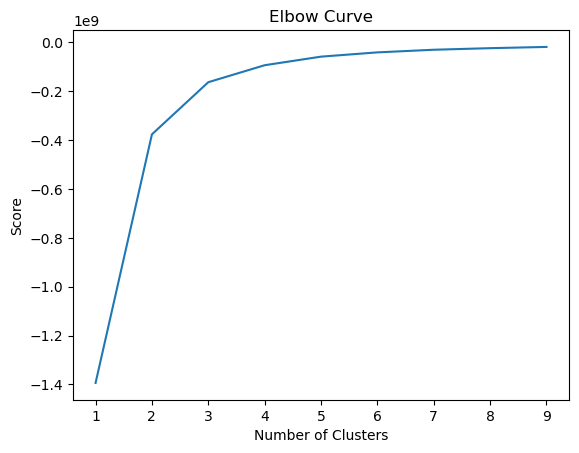

In [18]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Step 4

#### Observation: there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three

### Step 5

In [19]:
# Create the k-means object

kmeans = KMeans(n_clusters = 3)

In [20]:
# Fit the k-means object to the data
kmeans.fit(df_clean)

C:\Users\Kripamahesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

### Step 6

In [22]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs
df_clean['clusters'] = kmeans.fit_predict(df_clean)

C:\Users\Kripamahesh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Kripamahesh\AppData\Local\Temp\ipykernel_19412\2346166104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['clusters'] = kmeans.fit_predict(df_clean)


In [23]:
df_clean.head()

,id,year_reviewed,cocoa_percent,num_ingredients,rating,clusters
0,2454,2019,76.0,3.0,3.25,0
1,2458,2019,76.0,3.0,3.50,0
2,2454,2019,76.0,3.0,3.75,0
3,2542,2021,68.0,3.0,3.00,0
4,2546,2021,72.0,3.0,3.00,0


In [25]:
df_clean['clusters'].value_counts()

2    879
0    850
1    714
Name: clusters, dtype: int64

### Step 7

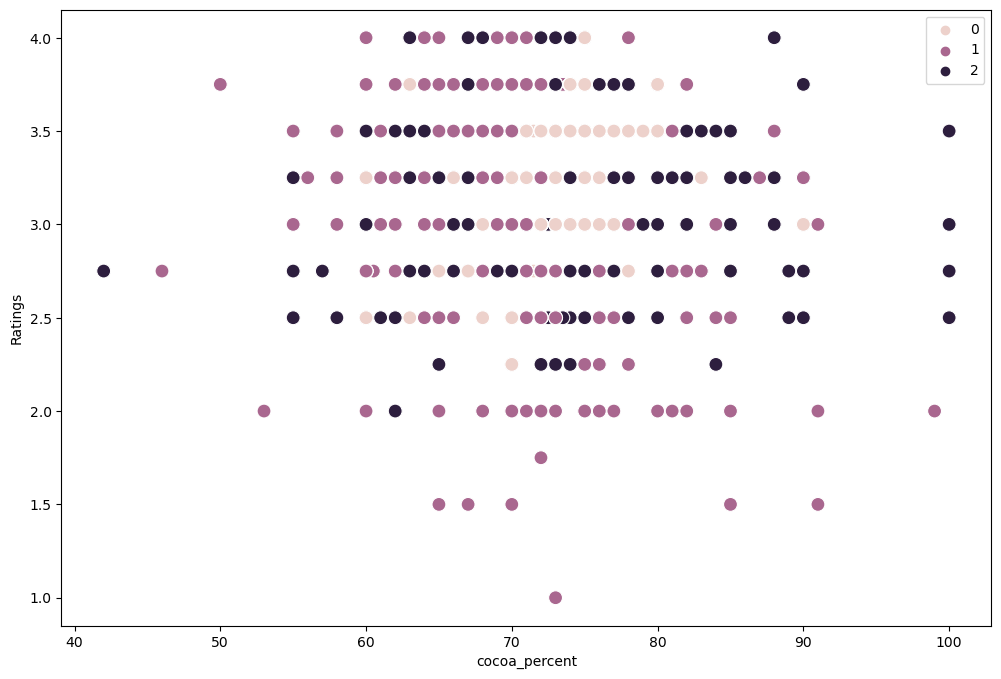

In [27]:
# Plot the clusters for cocoa_percent and rating

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x=df_clean['cocoa_percent'], y=df_clean['rating'], hue=kmeans.labels_, s=100)

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels.
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm
# `s` represents the size of the points you want to see in the plot

ax.grid(False) # This removes the grid from the background
plt.xlabel('cocoa_percent') # Label x-axis
plt.ylabel('Ratings') # Label y-axis
plt.show()

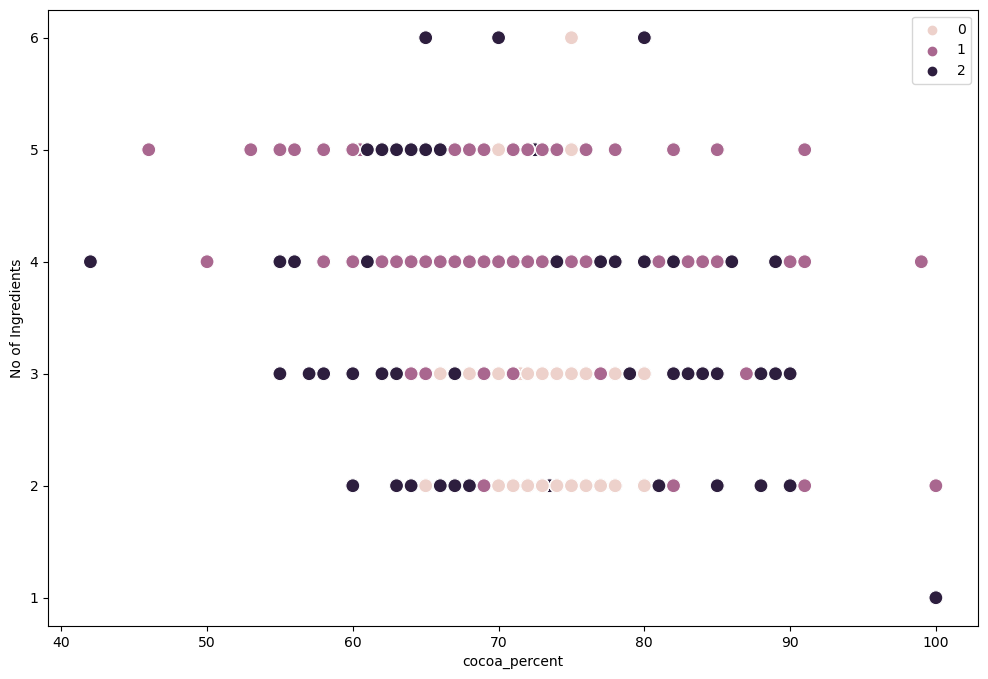

In [28]:
# Plot the clusters for cocoa_percent and num of ingredients 

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x=df_clean['cocoa_percent'], y=df_clean['num_ingredients'], hue=kmeans.labels_, s=100)
ax.grid(False) 
plt.xlabel('cocoa_percent')
plt.ylabel('No of Ingredients') 
plt.show()

In [30]:
df_clean.loc[df_clean['clusters'] == 2, 'cluster'] = 'dark purple'
df_clean.loc[df_clean['clusters'] == 1, 'cluster'] = 'purple'
df_clean.loc[df_clean['clusters'] == 0, 'cluster'] = 'light pink'

### Step 8

#### Observation: the plot cocoa_percent and ratings, some values are overlapping and spreaded all over.
####  the plot cocoa_percent and num_ingredients, num_ingredients 4 is not present and is less above 4 as well.

### Step 9

In [31]:
df_clean.groupby('cluster').agg({'cocoa_percent':['mean', 'median'],
                                'num_ingredients':['mean', 'median'],
                                'rating':['mean', 'median']})

cocoa_percent        num_ingredients           rating       
                     mean median            mean median      mean median
cluster                                                                 
dark purple     71.915245   70.0        2.910125    3.0  3.220705   3.25
light pink      71.503529   70.0        2.774118    3.0  3.241765   3.25
purple          70.973389   70.0        3.521008    4.0  3.159314   3.25

#### Observations:  the values/points of the 3 clusters are speaded all over and also there was positive relationship between any variables.
#### The no of ingredients used is less and the percent of cocoa preset th choco bars are not depend on the ingredients or the rating.
#### It is used to show and understand the data here how much each variables is present the analysis of data